# 프로젝트 개요

[ 파일명 수정 ]
- 2조(20609_김형진, 20615_장인수, 20620_최재혁)_외부요인에 의한 자가용 이용량 분석.ipynb

[ 팀원 ]
- 팀원 1 학번 : 20609
- 팀원 1 이름 : 김형진
- 팀원 2 학번 : 20615
- 팀원 2 이름 : 장인수
- 팀원 3 학번 : 20620
- 팀원 3 이름 : 최재혁
 
[ 주제 ]
- 프로젝트 주제 : 날씨와 유류 가격 등 외부 요인에 의한 자가용 이동량 및 대중교통 이용량 분석

[ 유의사항 ]
- 각 단계마다 Markdown과 Code를 최대한 구체적으로 작성할 것
- 아래의 양식은 가이드라인일 뿐, 머신러닝 과정의 6단계와 필수 조건이 모두 존재한다면 양식 및 순서 등을 자유롭게 수정하여 작성 가능함

# 1. 문제 정의 

[ 내용 ]
- 프로젝트 주제를 구체적으로 설명 (주제 / 선정 이유 / 계획 등)


[ 문제 정의 ]
- 주제 (# 필수 조건) : 외부 요인에 의한 자가용 이용량 & 대중교통 이용량 분석
- 선정 이유 (# 필수 조건) : 자동차 이용량이 여러 요인에 따라 달라질 때, 영향을 준 요인을 분석하기 위해 선정하였음
- 계획 : 자가용 이용량에 영향을 줄 만한 요인들을 분석하여, CSV 파일을 가져온 뒤, 파일들을 분석하여 가장 영향이 클 만한 요인으로 서울시의 교통량을 분석 할 계획입니다

In [2]:
# 문제 정의

# 2. 데이터 수집

[ 내용 ]
- 프로젝트 진행을 위해 필요한 데이터 수집
- 사이킷런에 내장되어 있는 학습용 데이터 사용 금지
- 수집한 데이터의 소스(사이트 및 링크) 반드시 기재 

[ 데이터 수집 ]
- 데이터 파일명 (# 필수 조건) : 
- 데이터 소스 (# 필수 조건) : 
- 

In [3]:
# 데이터 수집

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
gasoline_price = pd.read_csv('gasoline.csv', encoding='cp949')
gasoline_price

,구분,서울
0,2020년06월17일,1430.14
1,2020년06월18일,1431.91
2,2020년06월19일,1433.78
3,2020년06월20일,1435.17
4,2020년06월21일,1436.21
...,...,...
726,2022년06월13일,2140.80
727,2022년06월14일,2149.69
728,2022년06월15일,2155.02
729,2022년06월16일,2159.03


In [19]:
diesel_price = pd.read_csv('diesel.csv', encoding='cp949')
diesel_price

,구분,서울
0,2020년06월17일,1240.32
1,2020년06월18일,1241.71
2,2020년06월19일,1243.35
3,2020년06월20일,1245.04
4,2020년06월21일,1245.99
...,...,...
726,2022년06월13일,2136.35
727,2022년06월14일,2149.23
728,2022년06월15일,2157.28
729,2022년06월16일,2162.10


In [20]:
daily_traffic = pd.read_csv('daily_traffic.csv', encoding='cp949')
daily_traffic

,권역,입출구,2020.12.06,2020.12.07,2020.12.08,2020.12.09,2020.12.10,2020.12.11,2020.12.12,2020.12.13,...,2022.06.07,2022.06.08,2022.06.09,2022.06.10,2022.06.11,2022.06.12,2022.06.13,2022.06.14,2022.06.15,2022.06.16
0,수도권본부,출구,"1,078,145","1,423,350","1,405,607","1,418,693","1,431,632","1,495,446","1,276,019","878,245",...,"1,527,320","1,511,366","1,497,771","1,582,400","1,417,363","1,236,052","1,494,344","1,494,851","1,458,354","1,520,533"
1,강원본부,출구,"178,826","197,219","194,636","193,647","197,559","235,676","219,394","143,367",...,"216,326","214,976","214,423","258,824","255,520","209,919","221,271","211,687","206,979","220,686"
2,대전충남본부,출구,"273,571","308,932","298,639","300,256","301,894","334,871","300,967","228,876",...,"337,029","328,145","329,460","370,499","354,027","319,281","343,045","327,413","323,828","342,168"
3,전북본부,출구,"105,799","113,400","107,446","107,921","111,008","131,215","129,721","88,203",...,"115,309","112,753","116,710","140,792","161,900","122,368","121,501","112,034","112,161","121,599"
4,광주전남본부,출구,"227,531","231,053","225,886","227,321","231,144","269,108","265,556","210,126",...,"238,584","231,010","238,857","275,065","292,892","253,680","240,760","226,741","238,745","251,028"
5,대구경북본부,출구,"323,017","360,733","355,062","357,100","357,091","394,647","371,277","283,656",...,"425,293","418,355","422,592","468,905","458,059","396,703","424,691","393,165","410,879","432,608"
6,부산경남본부,출구,"536,274","643,109","628,480","631,374","640,220","709,891","655,618","521,947",...,"677,877","668,934","679,998","743,564","716,748","624,024","680,155","618,857","673,152","709,816"
7,충북본부,출구,"129,682","154,886","148,861","148,537","150,830","172,385","152,029","103,695",...,"174,318","165,956","167,431","195,984","195,881","162,065","174,276","165,773","165,167","174,040"
8,전국,출구,"2,852,845","3,432,682","3,364,617","3,384,849","3,421,378","3,743,239","3,370,581","2,458,115",...,"3,712,056","3,651,495","3,667,242","4,036,033","3,852,390","3,324,092","3,700,043","3,550,521","3,589,265","3,772,478"


In [21]:
precipitation = pd.read_csv('precipitation.csv', encoding='cp949')
precipitation

,지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,108,서울,2020-01-01,0.1,NaN,NaN,NaN
1,108,서울,2020-01-02,NaN,NaN,NaN,NaN
2,108,서울,2020-01-03,NaN,NaN,NaN,NaN
3,108,서울,2020-01-04,NaN,NaN,NaN,NaN
4,108,서울,2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
894,108,서울,2022-06-13,18.0,15.5,4:00,NaN
895,108,서울,2022-06-14,0.0,0.0,NaN,NaN
896,108,서울,2022-06-15,18.5,5.8,1:44,NaN
897,108,서울,2022-06-16,0.7,0.3,0:35,NaN


In [83]:
carinfo = pd.read_csv('carinfo.csv', encoding='cp949')
carinfo

,기준년월,사용본거지시읍면동_행정동기준,차명,연료,최초등록일,현소유자의출생년도
0,2022-02,서울특별시 구로구 신도림동,K7 하이브리드,하이브리드(휘발유+전기),2014-03-19,1967.0
1,2022-02,서울특별시 구로구 신도림동,토요타 Prius V,하이브리드(휘발유+전기),2017-04-28,1980.0
2,2022-02,서울특별시 구로구 신도림동,니로 하이브리드,하이브리드(휘발유+전기),2018-04-27,1990.0
3,2022-02,서울특별시 구로구 신도림동,투싼 하이브리드(TUCSON HYBRI,하이브리드(휘발유+전기),2021-07-14,1981.0
4,2022-02,서울특별시 구로구 신도림동,토요타 PRIUS,하이브리드(휘발유+전기),2012-03-16,1983.0
...,...,...,...,...,...,...
189936,2022-02,서울특별시 중랑구 중화2동,토요타 Camry Hybrid,하이브리드(휘발유+전기),2016-06-29,1970.0
189937,2022-02,서울특별시 중랑구 중화2동,니로 하이브리드,하이브리드(휘발유+전기),2017-10-25,1979.0
189938,2022-02,서울특별시 중랑구 중화2동,봉고Ⅲ 1톤 EV,전기,2021-10-26,1973.0
189939,2022-02,서울특별시 중랑구 중화2동,포터Ⅱ 일렉트릭 (PORTERⅡ EL,전기,2020-11-04,1958.0


# 3. 데이터 전처리

[ 내용 ]
- 데이터 분석 및 모델 학습을 위한 구조로 데이터를 가공하거나 변형
- 기본적으로 코드(판다스 및 넘파이 라이브러리 등 활용)를 통해 전처리 작업을 수행해야 하지만, 힘들 경우 데이터 파일 자체를 수정하여 전처리하여도 됨
- (# 필수 조건 : 위의 경우, 수행해야 하는 전처리 작업과 수행하지 못한 이유를 작성해야 함)
- 모든 전처리 작업이 수행된 최종 데이터를 명시해야 함

[ 데이터 전처리 ]
- 필요한 전처리 작업 : 
- 전처리 결과 : 
- 

In [4]:
# 데이터 전처리

In [23]:
daily_traffic = daily_traffic.transpose()
daily_traffic

,0,1,2,3,4,5,6,7,8
권역,수도권본부,강원본부,대전충남본부,전북본부,광주전남본부,대구경북본부,부산경남본부,충북본부,전국
입출구,출구,출구,출구,출구,출구,출구,출구,출구,출구
2020.12.06,"1,078,145","178,826","273,571","105,799","227,531","323,017","536,274","129,682","2,852,845"
2020.12.07,"1,423,350","197,219","308,932","113,400","231,053","360,733","643,109","154,886","3,432,682"
2020.12.08,"1,405,607","194,636","298,639","107,446","225,886","355,062","628,480","148,861","3,364,617"
...,...,...,...,...,...,...,...,...,...
2022.06.12,"1,236,052","209,919","319,281","122,368","253,680","396,703","624,024","162,065","3,324,092"
2022.06.13,"1,494,344","221,271","343,045","121,501","240,760","424,691","680,155","174,276","3,700,043"
2022.06.14,"1,494,851","211,687","327,413","112,034","226,741","393,165","618,857","165,773","3,550,521"
2022.06.15,"1,458,354","206,979","323,828","112,161","238,745","410,879","673,152","165,167","3,589,265"


In [24]:
print('휘발유 데이터의 결측치\n',gasoline_price.isna().sum(), end='\n\n')
print('경유 데이터의 결측치\n', diesel_price.isna().sum(), end='\n\n')
print('일일 교통량 데이터의 결측치\n', daily_traffic.isna().sum(), end='\n\n')
print('강수량 데이터의 결측치\n', precipitation.isna().sum(), end='\n\n')

휘발유 데이터의 결측치
 구분    0
서울    0
dtype: int64

경유 데이터의 결측치
 구분    0
서울    0
dtype: int64

일일 교통량 데이터의 결측치
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

강수량 데이터의 결측치
 지점번호              0
지점명               0
일시                0
강수량(mm)         531
1시간최다강수량(mm)    669
1시간최다강수량시각      744
Unnamed: 6      750
dtype: int64



In [25]:
precipitation = precipitation.fillna(0)
print('강수량 데이터의 결측치\n', precipitation.isna().sum(), end='\n\n')

강수량 데이터의 결측치
 지점번호            0
지점명             0
일시              0
강수량(mm)         0
1시간최다강수량(mm)    0
1시간최다강수량시각      0
Unnamed: 6      0
dtype: int64



In [26]:
daily_traffic = daily_traffic.drop(labels=['권역', '입출구'], axis=0)
daily_traffic = daily_traffic.drop(columns=list(range(0,8)), axis=1)
daily_traffic = daily_traffic.rename(columns={8:'전국'})
daily_traffic

,전국
2020.12.06,"2,852,845"
2020.12.07,"3,432,682"
2020.12.08,"3,364,617"
2020.12.09,"3,384,849"
2020.12.10,"3,421,378"
...,...
2022.06.12,"3,324,092"
2022.06.13,"3,700,043"
2022.06.14,"3,550,521"
2022.06.15,"3,589,265"


In [27]:
daily_traffic = daily_traffic.reset_index()
daily_traffic = daily_traffic.rename(columns={'index':'날짜'})
daily_traffic

,날짜,전국
0,2020.12.06,"2,852,845"
1,2020.12.07,"3,432,682"
2,2020.12.08,"3,364,617"
3,2020.12.09,"3,384,849"
4,2020.12.10,"3,421,378"
...,...,...
553,2022.06.12,"3,324,092"
554,2022.06.13,"3,700,043"
555,2022.06.14,"3,550,521"
556,2022.06.15,"3,589,265"


In [28]:
for i in range(len(daily_traffic)):
  daily_traffic['날짜'][i] = daily_traffic['날짜'][i].replace('.', '')
  daily_traffic['전국'][i] = daily_traffic['전국'][i].replace(',', '')
daily_traffic

,날짜,전국
0,20201206,2852845
1,20201207,3432682
2,20201208,3364617
3,20201209,3384849
4,20201210,3421378
...,...,...
553,20220612,3324092
554,20220613,3700043
555,20220614,3550521
556,20220615,3589265


In [29]:
for i in range(len(gasoline_price)):
  gasoline_price['구분'][i] = gasoline_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')

gasoline_price = gasoline_price.rename(columns={'구분':'날짜', '서울':'휘발유'})
gasoline_price

C:\Users\user\AppData\Local\Temp\ipykernel_11476\2749514706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoline_price['구분'][i] = gasoline_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')


,날짜,휘발유
0,20200617,1430.14
1,20200618,1431.91
2,20200619,1433.78
3,20200620,1435.17
4,20200621,1436.21
...,...,...
726,20220613,2140.80
727,20220614,2149.69
728,20220615,2155.02
729,20220616,2159.03


In [30]:
for i in range(len(diesel_price)):
  diesel_price['구분'][i] = diesel_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')

diesel_price = diesel_price.rename(columns={'구분':'날짜', '서울':'경유'})
diesel_price

C:\Users\user\AppData\Local\Temp\ipykernel_11476\2067969374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_price['구분'][i] = diesel_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')


,날짜,경유
0,20200617,1240.32
1,20200618,1241.71
2,20200619,1243.35
3,20200620,1245.04
4,20200621,1245.99
...,...,...
726,20220613,2136.35
727,20220614,2149.23
728,20220615,2157.28
729,20220616,2162.10


In [31]:
precipitation = precipitation.rename(columns={'일시':'날짜'})
precipitation = precipitation.drop(columns=['지점번호', '지점명', '1시간최다강수량(mm)', '1시간최다강수량시각', 'Unnamed: 6'])

for i in range(len(precipitation)):
  precipitation['날짜'][i] = precipitation['날짜'][i].replace('-', '')
  
precipitation

C:\Users\user\AppData\Local\Temp\ipykernel_11476\4233384256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation['날짜'][i] = precipitation['날짜'][i].replace('-', '')


,날짜,강수량(mm)
0,20200101,0.1
1,20200102,0.0
2,20200103,0.0
3,20200104,0.0
4,20200105,0.0
...,...,...
894,20220613,18.0
895,20220614,0.0
896,20220615,18.5
897,20220616,0.7


In [32]:
diesel_price = diesel_price[diesel_price['날짜'].between('20201206','20220616')]
gasoline_price = gasoline_price[gasoline_price['날짜'].between('20201206','20220616')]
precipitation = precipitation[precipitation['날짜'].between('20201206','20220616')]

In [33]:
daily_traffic = daily_traffic.astype({'전국':'int'})
daily_traffic.dtypes

날짜    object
전국     int32
dtype: object

In [84]:
carinfo = carinfo.drop(labels=['기준년월', '현소유자의출생년도', '사용본거지시읍면동_행정동기준'], axis=1)
carinfo

,차명,연료,최초등록일
0,K7 하이브리드,하이브리드(휘발유+전기),2014-03-19
1,토요타 Prius V,하이브리드(휘발유+전기),2017-04-28
2,니로 하이브리드,하이브리드(휘발유+전기),2018-04-27
3,투싼 하이브리드(TUCSON HYBRI,하이브리드(휘발유+전기),2021-07-14
4,토요타 PRIUS,하이브리드(휘발유+전기),2012-03-16
...,...,...,...
189936,토요타 Camry Hybrid,하이브리드(휘발유+전기),2016-06-29
189937,니로 하이브리드,하이브리드(휘발유+전기),2017-10-25
189938,봉고Ⅲ 1톤 EV,전기,2021-10-26
189939,포터Ⅱ 일렉트릭 (PORTERⅡ EL,전기,2020-11-04


In [90]:
cs = carinfo.sort_values('최초등록일', ascending=True)

cs.loc()
cs

,차명,연료,최초등록일
55044,베르나하이브리드(VERNA),하이브리드(휘발유+전기),2005-11-02
13846,프라이드하이브리드,하이브리드(휘발유+전기),2005-11-28
113671,베르나하이브리드(VERNA),하이브리드(휘발유+전기),2005-11-30
102681,베르나하이브리드(VERNA),하이브리드(휘발유+전기),2005-12-12
38107,베르나하이브리드(VERNA),하이브리드(휘발유+전기),2005-12-22
...,...,...,...
168222,BMW 530e,하이브리드(휘발유+전기),2022-02-28
94897,Mercedes-Benz E300 e 4MATIC,하이브리드(휘발유+전기),2022-02-28
125843,쏘렌토 하이브리드,하이브리드(휘발유+전기),2022-02-28
60716,스포티지 하이브리드,하이브리드(휘발유+전기),2022-02-28


In [34]:
result = pd.merge(daily_traffic, gasoline_price)
result = pd.merge(result, diesel_price)
result = pd.merge(result, precipitation)
result 

,날짜,전국,휘발유,경유,강수량(mm)
0,20201206,2852845,1420.48,1227.59,0.0
1,20201207,3432682,1421.92,1228.70,0.0
2,20201208,3364617,1424.18,1230.83,0.0
3,20201209,3384849,1425.68,1231.72,0.0
4,20201210,3421378,1427.67,1233.75,0.0
...,...,...,...,...,...
553,20220612,3324092,2132.46,2126.05,0.0
554,20220613,3700043,2140.80,2136.35,18.0
555,20220614,3550521,2149.69,2149.23,0.0
556,20220615,3589265,2155.02,2157.28,18.5


In [35]:
result.describe()

,전국,휘발유,경유,강수량(mm)
count,5.580000e+02,558.000000,558.000000,558.000000
mean,3.516767e+06,1738.891828,1573.550305,2.467921
std,3.593153e+05,175.046031,227.722284,9.036781
min,2.054131e+06,1420.480000,1227.590000,0.000000
25%,3.370189e+06,1615.442500,1415.150000,0.000000
50%,3.574620e+06,1721.735000,1523.895000,0.000000
75%,3.726270e+06,1804.152500,1626.077500,0.300000
max,4.378596e+06,2159.030000,2162.100000,77.400000


In [36]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       558 non-null    object 
 1   전국       558 non-null    int32  
 2   휘발유      558 non-null    float64
 3   경유       558 non-null    float64
 4   강수량(mm)  558 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 24.0+ KB


In [63]:
result = result.rename(columns={'전국':'교통량'})
result

,날짜,교통량,휘발유,경유,강수량(mm)
0,20201206,2852845,1420.48,1227.59,0.0
1,20201207,3432682,1421.92,1228.70,0.0
2,20201208,3364617,1424.18,1230.83,0.0
3,20201209,3384849,1425.68,1231.72,0.0
4,20201210,3421378,1427.67,1233.75,0.0
...,...,...,...,...,...
553,20220612,3324092,2132.46,2126.05,0.0
554,20220613,3700043,2140.80,2136.35,18.0
555,20220614,3550521,2149.69,2149.23,0.0
556,20220615,3589265,2155.02,2157.28,18.5


# 4. 데이터 분석

[ 내용 ]
- 수집한 데이터의 탐색 및 분석을 진행
- 반드시 하나 이상의 그래프(맷플롯립 라이브러리 등 활용)를 활용해야 함 (# 필수 조건)
- 매 데이터 분석의 결과를 명시해야 함 (# 필수 조건)

[ 데이터 분석 ]
- 분석 내용 : 
- 분석 결과 : 
- 

In [109]:
# 데이터 분석

In [37]:
import datetime
from dateutil.relativedelta import relativedelta

result_day = result['날짜'][0]
check_day = datetime.date(int(result_day[:4]), int(result_day[4:6]), int(result_day[6:]))
graph_gas_price_xlabels = []

for i in range(int((len(result)/ 30))+1):
  graph_gas_price_xlabels.append(check_day + relativedelta(months=1)*i)

for i in range(len(graph_gas_price_xlabels)):
  graph_gas_price_xlabels[i] = str(graph_gas_price_xlabels[i])[:7].replace('-', '')

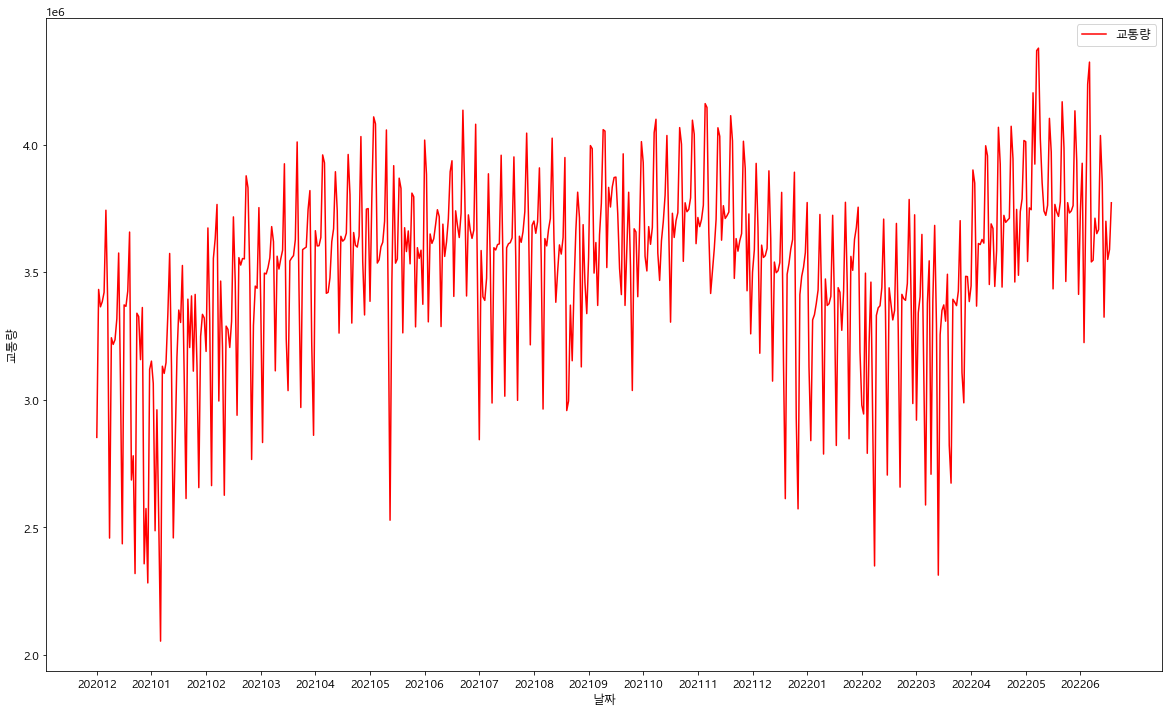

In [45]:
day = result['날짜']
daily_traffic_in = result['교통량']

plt.rc('font', family='Malgun Gothic', size='12')
plt.figure(figsize=(20, 12))

plt.xlabel('날짜')
plt.ylabel('교통량')

plt.xticks(np.arange(0, len(result), 30), labels=graph_gas_price_xlabels)

plt.plot(daily_traffic_in, c='red', label='교통량')

plt.legend()
plt.show()

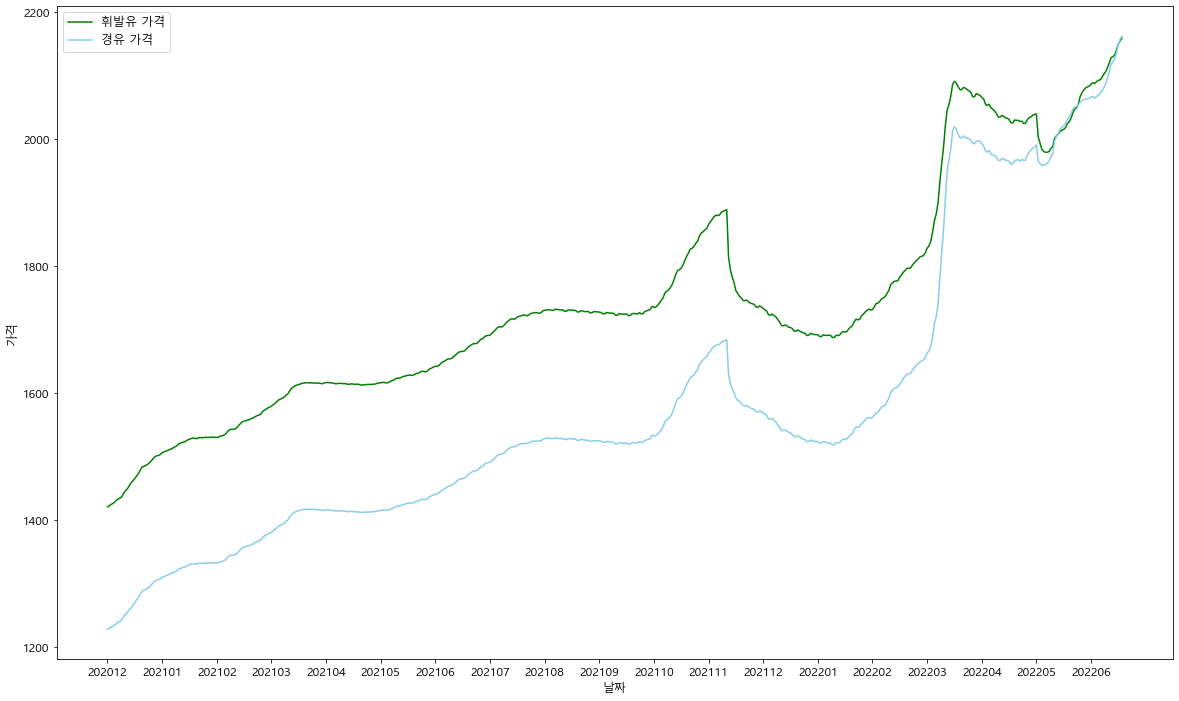

In [46]:
day = result['날짜']
gasoline_price_in = result['휘발유']
diesel_price_in = result['경유']

plt.rc('font', family='Malgun Gothic', size='12')
plt.figure(figsize=(20, 12))

plt.xlabel('날짜')
plt.ylabel('가격')

plt.xticks(np.arange(0, len(result), 30), labels=graph_gas_price_xlabels)

plt.plot(gasoline_price_in, c='green', label='휘발유 가격')
plt.plot(diesel_price_in, c='skyblue', label='경유 가격')

plt.legend()
plt.show()

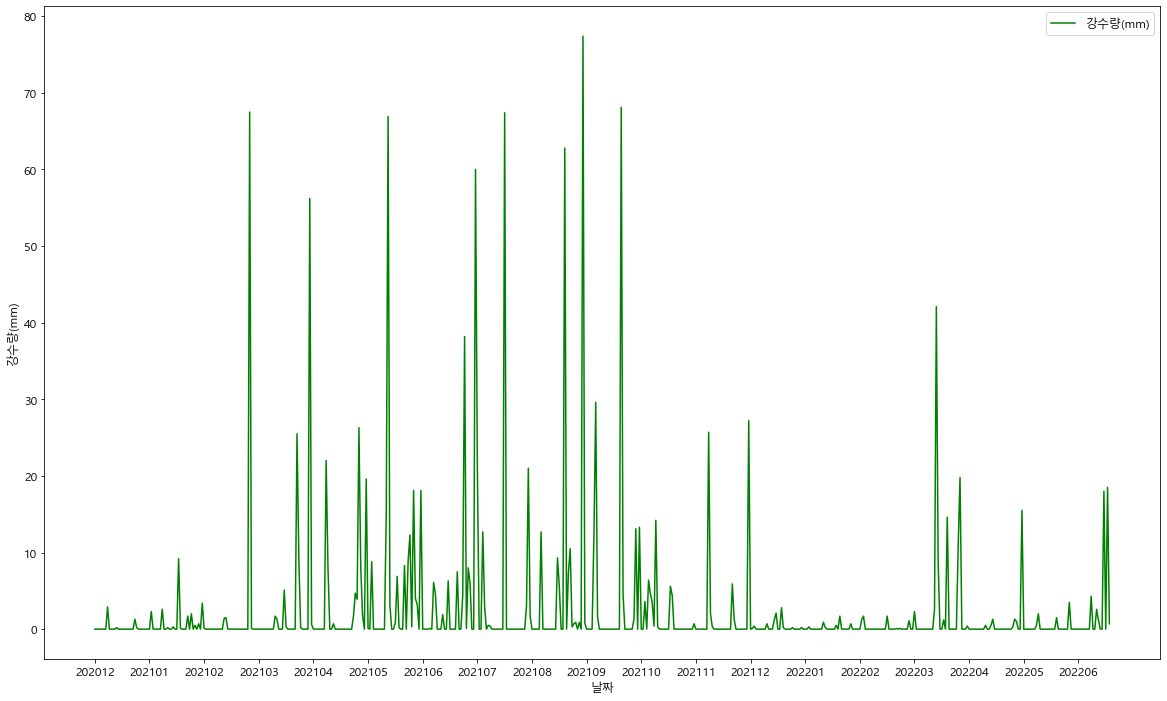

In [47]:
day = result['날짜']
precipitation_price_in = result['강수량(mm)']

plt.rc('font', family='Malgun Gothic', size='12')
plt.figure(figsize=(20, 12))

plt.xlabel('날짜')
plt.ylabel('강수량(mm)')

plt.xticks(np.arange(0, len(result), 30), labels=graph_gas_price_xlabels)

plt.plot(precipitation_price_in, c='green', label='강수량(mm)')

plt.legend()
plt.show()

# 5. 모델 학습

[ 내용 ] 
- 머신러닝 알고리즘(회귀 및 분류)을 사용하여 모델의 학습을 진행
- 수업시간에 배운 것 이외의 알고리즘도 사용 가능함
- (# 필수 조건 : 위의 경우, 해당 알고리즘의 원리 및 간단한 설명을 작성해야 함)
- 반드시 '훈련 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 학습 ]
- 사용한 머신러닝 알고리즘 (# 필수 조건) : 
- 해당 알고리즘의 원리 : 
- 

In [110]:
# 모델 학습

In [72]:
result

,날짜,교통량,휘발유,경유,강수량(mm)
0,20201206,2852845,1420.48,1227.59,0.0
1,20201207,3432682,1421.92,1228.70,0.0
2,20201208,3364617,1424.18,1230.83,0.0
3,20201209,3384849,1425.68,1231.72,0.0
4,20201210,3421378,1427.67,1233.75,0.0
...,...,...,...,...,...
553,20220612,3324092,2132.46,2126.05,0.0
554,20220613,3700043,2140.80,2136.35,18.0
555,20220614,3550521,2149.69,2149.23,0.0
556,20220615,3589265,2155.02,2157.28,18.5


In [75]:
# 휘발유 데이터 구조 변환
gasoline = result['휘발유']
print(gasoline.shape)

gasoline = gasoline.to_numpy()
gasoline = gasoline.reshape(-1, 1)
print(gasoline.shape)


# 교통량 데이터 구조 변환
traffic = result['교통량']
print(traffic.shape)

traffic = traffic.to_numpy()
traffic = traffic.reshape(-1, 1)
print(traffic.shape)


# 경유 데이터 구조 변환
diesel = result['경유']
print(diesel.shape)

diesel = diesel.to_numpy()
diesel = diesel.reshape(-1, 1)
print(diesel.shape)


# 강수량 데이터 구조 변환
rain = result['강수량(mm)']
print(rain.shape)

rain = rain.to_numpy()
rain = rain.reshape(-1, 1)
print(rain.shape)

(558,)
(558, 1)
(558,)
(558, 1)
(558,)
(558, 1)
(558,)
(558, 1)


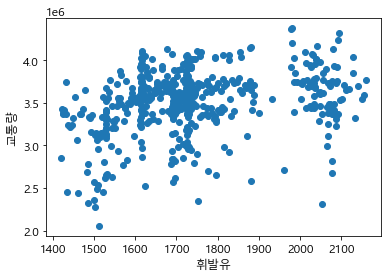

In [76]:
plt.scatter(gasoline, traffic)
plt.rc('font', family='Malgun Gothic')

plt.xlabel('휘발유')
plt.ylabel('교통량')
plt.show()

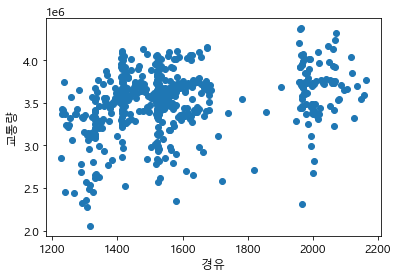

In [77]:
plt.scatter(diesel, traffic)
plt.rc('font', family='Malgun Gothic')

plt.xlabel('경유')
plt.ylabel('교통량')
plt.show()

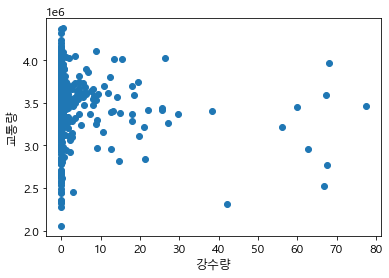

In [78]:
plt.scatter(rain, traffic)
plt.rc('font', family='Malgun Gothic')

plt.xlabel('강수량')
plt.ylabel('교통량')
plt.show()

(418, 1) (418, 1) (140, 1) (140, 1)


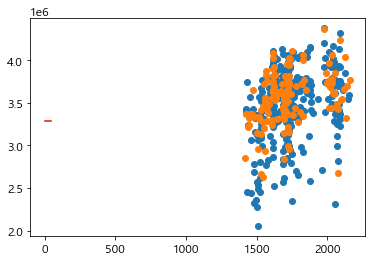

0.398123672822696
-0.14116670682875854


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_in, test_in, train_tg, test_tg = train_test_split(gasoline, traffic, random_state = 42)
print(train_in.shape, train_tg.shape, test_in.shape, test_tg.shape)

model = KNeighborsRegressor()
model.fit(train_in, train_tg)

x = np.arange(5, 45).reshape(-1, 1)
plt.scatter(train_in, train_tg)
plt.scatter(test_in, test_tg)
plt.plot(x, model.predict(x), "r")    
plt.rc('font', family = 'Malgun Gothic')
plt.show()

score_train = model.score(train_in, train_tg); print(score_train)  #훈련 세트 평가 성능 점수
score_target = model.score(test_in, test_tg); print(score_target) #테스트 세트 평가 성능 점수

(418, 1) (418, 1) (140, 1) (140, 1)


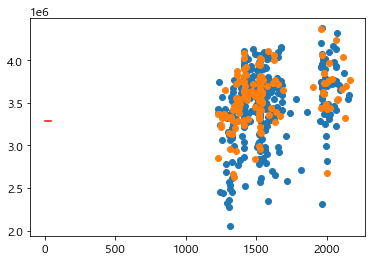

0.36618063095902353
-0.14530139259299268


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_in, test_in, train_tg, test_tg = train_test_split(diesel, traffic, random_state = 42)
print(train_in.shape, train_tg.shape, test_in.shape, test_tg.shape)

model = KNeighborsRegressor()
model.fit(train_in, train_tg)

x = np.arange(5, 45).reshape(-1, 1)
plt.scatter(train_in, train_tg)
plt.scatter(test_in, test_tg)
plt.plot(x, model.predict(x), "r")    
plt.rc('font', family = 'Malgun Gothic')
plt.show()

score_train = model.score(train_in, train_tg); print(score_train)  #훈련 세트 평가 성능 점수
score_target = model.score(test_in, test_tg); print(score_target) #테스트 세트 평가 성능 점수

(418, 1) (418, 1) (140, 1) (140, 1)


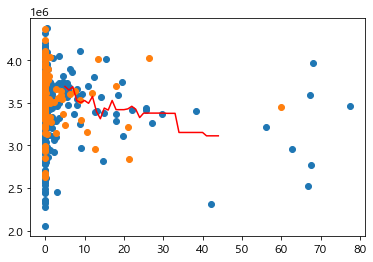

-0.3065686816648783
-0.5317044000013977


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_in, test_in, train_tg, test_tg = train_test_split(rain, traffic, random_state = 42)
print(train_in.shape, train_tg.shape, test_in.shape, test_tg.shape)

model = KNeighborsRegressor()
model.fit(train_in, train_tg)

x = np.arange(5, 45).reshape(-1, 1)
plt.scatter(train_in, train_tg)
plt.scatter(test_in, test_tg)
plt.plot(x, model.predict(x), "r")    
plt.rc('font', family = 'Malgun Gothic')
plt.show()

score_train = model.score(train_in, train_tg); print(score_train)  #훈련 세트 평가 성능 점수
score_target = model.score(test_in, test_tg); print(score_target) #테스트 세트 평가 성능 점수

# 6. 모델 평가

[ 내용 ]
- 학습이 완료된 모델을 통해 값을 예측해보고, 최종적으로 모델의 성능을 평가
- 반드시 '테스트 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 평가 ]
- 성능 평가 결과 : 
- 

In [111]:
# 모델 평가

# 프로젝트 마무리

[ 결론 ]
- 진행한 프로젝트 정리

- 요약 (# 필수 조건) : 
- 의의 (# 필수 조건) : 
- 느낀점 (# 필수 조건) : 
- 